In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Imports

In [2]:
from fastai import *
from fastai.vision import *

### Creating Image data bunch object

In [3]:
path_img = "fruits-360"

In [4]:
# labelling the data using folder names
tfms = get_transforms(do_flip=False)

data = ImageDataBunch.from_folder(path_img, ds_tfms=tfms, size=200)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (41322 items)
[Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3]...
Path: fruits-360
x: ImageItemList (41322 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: fruits-360;

Valid: LabelList
y: CategoryList (13877 items)
[Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3]...
Path: fruits-360
x: ImageItemList (13877 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: fruits-360;

Test: None

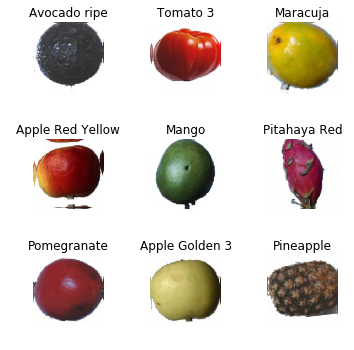

In [5]:
data.show_batch(rows=3, figsize=(5,5))

### Creating the model

In [6]:
learner = create_cnn(data, models.resnet34, metrics=error_rate)

### Loading the parameters from the saved model

In [7]:
learner.load('fruit-model2')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (41322 items)
[Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3]...
Path: fruits-360
x: ImageItemList (41322 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: fruits-360;

Valid: LabelList
y: CategoryList (13877 items)
[Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3]...
Path: fruits-360
x: ImageItemList (13877 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: fruits-360;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, paddi

### Web application using Flask

In [ ]:
import wikipedia
import re
import os
from flask import Flask, flash, request, redirect, url_for, render_template
from werkzeug.utils import secure_filename

UPLOAD_FOLDER = 'uploads'
ALLOWED_EXTENSIONS = set(['txt', 'pdf', 'png', 'jpg', 'jpeg', 'gif'])

app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def allowed_file(filename):
    return '.' in filename and \
           filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS
    
@app.route("/")
def home():
    return render_template('home.html')

@app.route('/upload', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # check if the post request has the file part
        if 'file' not in request.files:
            flash('No file part')
            return redirect(request.url)
        file = request.files['file']
        # if user does not select file, browser also
        # submit an empty part without filename
        if file.filename == '':
            flash('No selected file')
            return redirect(request.url)
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
            img = open_image(file)
            pred_class,pred_idx,outputs = learner.predict(img)
            print(pred_class)

            full_content = wikipedia.summary(pred_class)
            content = full_content.split("\n\n")[0]

            print(content)
            return render_template('identify.html', fruit = pred_class, content = content)
    

if __name__ == '__main__':
    app.run()
 